In [10]:
from lightkurve import KeplerLightCurveFile
from george import kernels
from george.metrics import Metric
import matplotlib.pyplot as plt
import numpy as np
import george
from astropy.stats import median_absolute_deviation

str = KeplerLightCurveFile.from_archive(210408563)
strPDC = str.PDCSAP_FLUX.remove_outliers()

Found 1 File(s)
INFO: Found cached file ./mastDownload/K2/ktwo210408563-c04_lc/ktwo210408563-c04_llc.fits with expected size 377280. [astroquery.query]


/anaconda/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:165: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/anaconda/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:166: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


In [11]:
from scipy.optimize import minimize 
def neg_ln_like(p): # set parameters vectors and return the likelihood
    gp.set_parameter_vector(p)
    return -gp.log_likelihood(y)

def grad_neg_ln_like(p):
    gp.set_parameter_vector(p)
    return -gp.grad_log_likelihood(y)

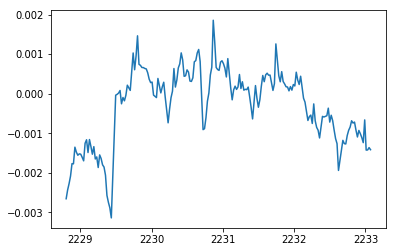

In [12]:

y = strPDC.flux[:200]
x = strPDC.time[:200]
y = (y/np.median(y)) - 1
x = x[np.isfinite(y)]
y = y[np.isfinite(y)]


plt.plot(x,y)

In [13]:
kernel = np.var(y) * kernels.ExpSquaredKernel(1) * kernels.CosineKernel(log_period = 0.5)
gp = george.GP(kernel)
gp.compute(x,y)
predVar = gp.predict(y,x, return_var = True)

In [14]:
result = minimize(neg_ln_like, gp.get_parameter_vector(), jac=grad_neg_ln_like)
print(result)
gp.set_parameter_vector(result.x)
pred = gp.predict(y, x, return_var = True)

      fun: -1256.562510565484
 hess_inv: array([[ 4.00142343e-01,  1.28424937e-01, -1.08933440e+01],
       [ 1.28424937e-01,  3.34458801e-01, -3.04120938e+03],
       [-1.08933440e+01, -3.04120938e+03,  7.41669664e+07]])
      jac: array([ 1.56627857e-06, -4.89200652e-06, -1.30485736e-09])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 44
     njev: 52
   status: 0
  success: True
        x: array([-15.30076016,  -1.84079107,   6.55597916])


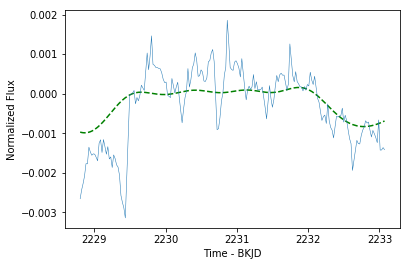

In [15]:
pred, pred_var = gp.predict(y, x, return_var = True)

#print(xpred.size)
#print(pred.size)
#print(x.size)
#print(y.size)

plt.plot(x,pred, "--g")
plt.xlabel('Time - BKJD')
plt.ylabel('Normalized Flux')
plt.plot(x,y, lw=0.5)

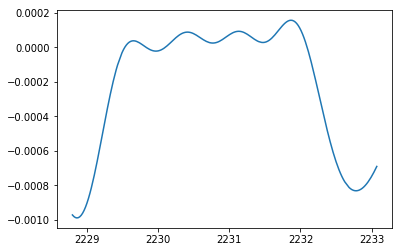

In [16]:
plt.plot(x,pred) # the predicted fit